# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>**TMDb movie data**
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

>**column names**
 ['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']
 The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


In [44]:
#  import statements for all of the packages i will use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [45]:
 Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


In [46]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
d1 = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df = pd.DataFrame(d1)

In [47]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [48]:
df.shape

(10866, 21)

In [49]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning
> drop unused columns 
 

In [51]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['tagline', 'homepage', 'keywords', 'vote_average','release_date','budget_adj','revenue_adj','overview','runtime'], axis = 1, inplace = True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,2015
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,2015
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,2015
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,2015


> split columns with "|"

In [53]:

df = df.join(df['production_companies'].str.split('|', expand=True).add_prefix('production_companies'))
df = df.join(df['genres'].str.split('|', expand=True).add_prefix('genres'))
df = df.join(df['cast'].str.split('|', expand=True).add_prefix('cast'))

df

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,genres,production_companies,...,genres0,genres1,genres2,genres3,genres4,cast0,cast1,cast2,cast3,cast4
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,...,Action,Adventure,Science Fiction,Thriller,None,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,...,Action,Adventure,Science Fiction,Thriller,None,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,...,Adventure,Science Fiction,Thriller,None,None,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,...,Action,Adventure,Science Fiction,Fantasy,None,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,...,Action,Crime,Thriller,None,None,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,...,Western,Drama,Adventure,Thriller,None,Leonardo DiCaprio,Tom Hardy,Will Poulter,Domhnall Gleeson,Paul Anderson
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,...,Science Fiction,Action,Thriller,Adventure,None,Arnold Schwarzenegger,Jason Clarke,Emilia Clarke,Jai Courtney,J.K. Simmons
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,...,Drama,Adventure,Science Fiction,None,None,Matt Damon,Jessica Chastain,Kristen Wiig,Jeff Daniels,Michael PeÃ±a
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,...,Family,Animation,Adventure,Comedy,None,Sandra Bullock,Jon Hamm,Michael Keaton,Allison Janney,Steve Coogan
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,...,Comedy,Animation,Family,None,None,Amy Poehler,Phyllis Smith,Richard Kind,Bill Hader,Lewis Black


> drop duplicates

In [54]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (Replace this header name!) Which year produced the best movies ? 

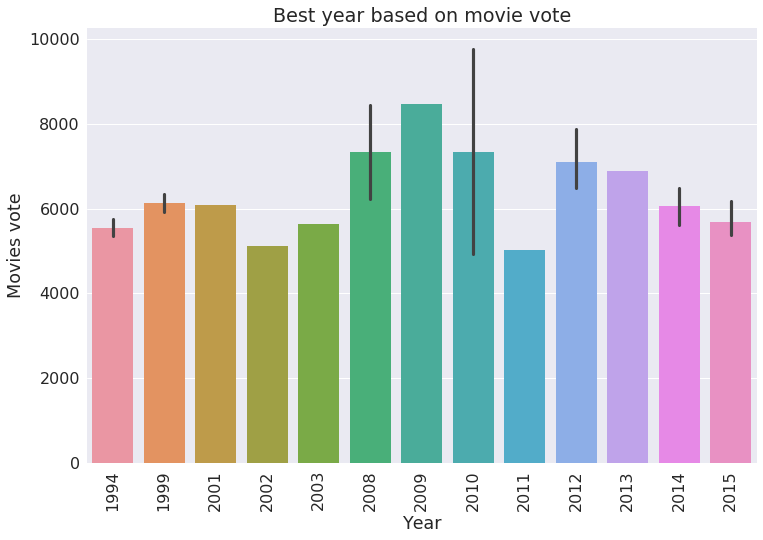

In [112]:
sns.set(rc={'figure.figsize':(12,8)}, font_scale=1.6)
year_vote = df[['release_year','vote_count']]

pl = sns.barplot(

    year_vote.sort_values(by="vote_count", ascending=False).head(25).release_year, 
    
    year_vote.sort_values(by="vote_count", ascending=False).head(25).vote_count)


for i in pl.get_xticklabels():
    i.set_rotation(90)

pl.set(xlabel='Year', ylabel='Movies vote', title = 'Best year based on movie vote')
plt.show()

### Research Question 2  Does a higher budget make a movie more successful?

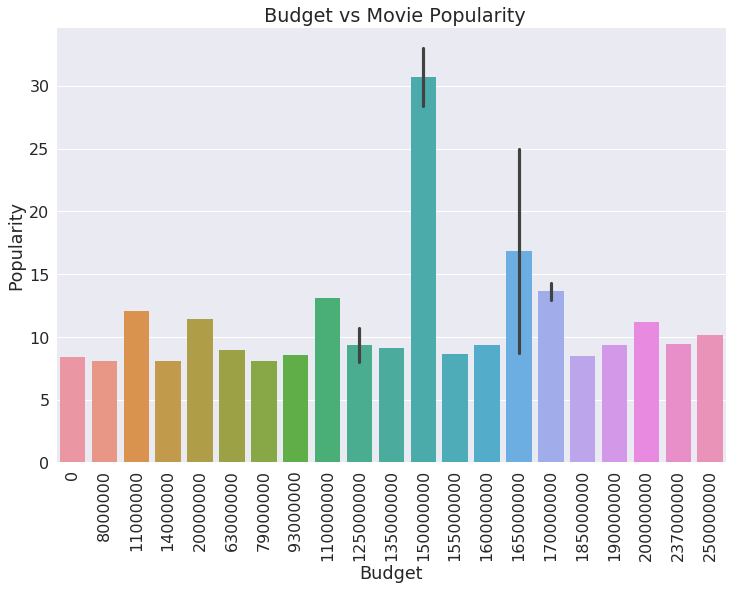

In [94]:
sns.set(rc={'figure.figsize':(12,8)}, font_scale=1.6)
popularity_budget = df[['popularity','budget']]

pl = sns.barplot(
    popularity_budget.sort_values(by="popularity", ascending=False).head(25).budget, 
    popularity_budget.sort_values(by="popularity", ascending=False).head(25).popularity)

for i in pl.get_xticklabels():
    i.set_rotation(90)

pl.set(xlabel='Budget', ylabel='Popularity', title = ' Budget vs Movie Popularity')
plt.show()

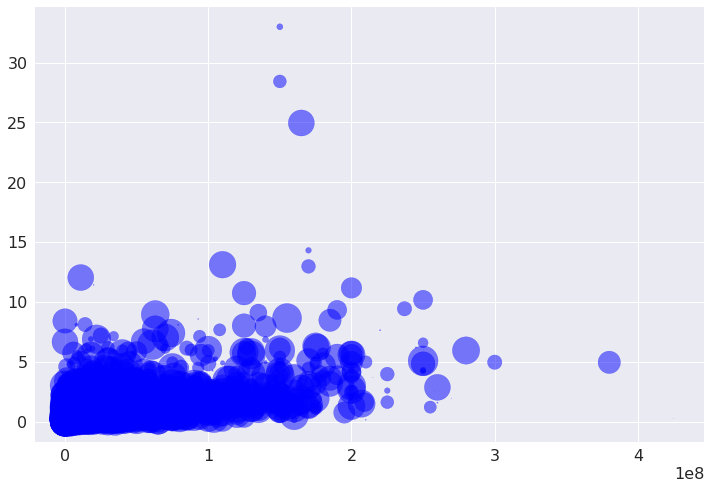

In [92]:
N = 50
area = (30 * np.random.rand(N))**2  

plt.scatter(df.budget, df.popularity, s=area, c='blue', alpha=0.5)

plt.show()

In [79]:
movie_popul = df[['original_title','popularity']]
bestmovie=movie_popul.sort_values(by="popularity", ascending=True).head(25).original_title
#bestmovie.value_counts().idxmax()
bestmovie

6181                  North and South, Book I
9977                             The Hospital
6080                                   G.B.F.
6551               Mon petit doigt m'a dit...
6961                        Khosla Ka Ghosla!
7268                       Born into Brothels
7256                                SoupÃ§ons
3370                           Fuera de carta
2874                                 Slashers
4948                        The Invisible War
1918                          Circle of Eight
7267                           Long Way Round
10592                               Yuppies 2
4919     Freddie Mercury: The Great Pretender
9593                                Peter Pan
3369      Wizards On Deck With Hannah Montana
4947                    The Central Park Five
6553                                   Paheli
3910               Steve Jobs: One Last Thing
8053                           Acqua e sapone
6079                 The Sound of Music Live!
4945                    The Pregna

In [110]:
df['revenue'].max()


2781505847

In [109]:
df['revenue'].mean()

39826896.076852277

In [83]:
df['budget'].max()

425000000

In [108]:
df['budget'].mean()

14624286.06433502

In [101]:
df['cast'].mode()

0    Louis C.K.
dtype: object

In [103]:
df['genres'].mode()

0    Comedy
1     Drama
dtype: object

In [104]:
df['director'].mode()

0    Woody Allen
dtype: object

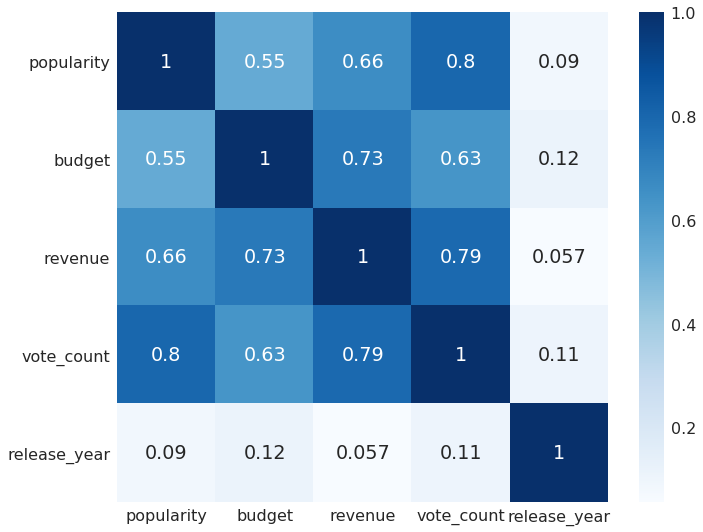

In [98]:
updated_df=df.drop(columns="id", axis=1)
plt.figure(figsize=(11,9))
sns.heatmap(updated_df.corr(), annot=True, cmap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87e0e58c88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f87e03f45f8>]], dtype=object)

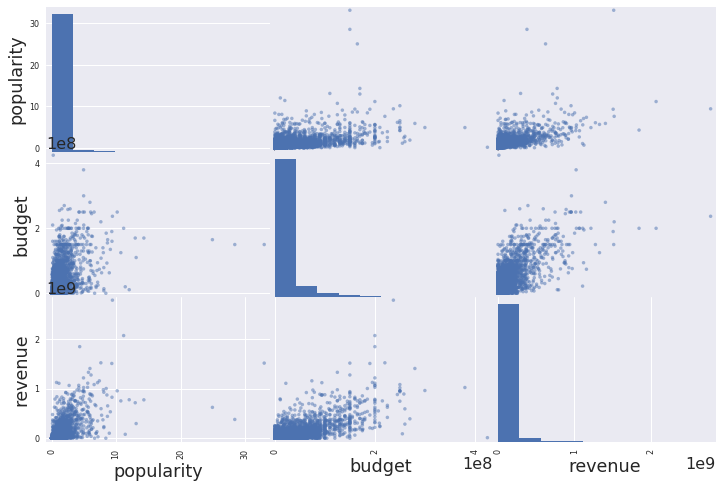

In [100]:
from pandas.plotting import scatter_matrix
attributes = ["popularity","budget","revenue"]
scatter_matrix(df[attributes],figsize=(12,8))

<a id='conclusions'></a>
## Conclusions



- Bsed on movies vote, the best movies realsed in the following years : 2009,2008,2010,2012
- The lowest-voted movies produced in 2002 and 2011
- The most Popular movie is Yuppies 2
- based on the correlation,revnue is directly linked to the budget 
- there is a moderately correlation between Budget and  Popularity 
- The highest budget in movies is 425000000 
- the average  budget in movies is 14624286 
- The highest revenue in movies is 2781505847
- The average revenue in movies is 39826896
- the most frequent is drama following by Comedy
- The most frequent name of an actor is Louis C.K.
- The most frequent name of an director is Woody Allen  


## Limitations 
 
I wish the dataset has accurate budget and revnues 

In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0